In [1]:
# Instalando a API do Banco Central
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 


In [2]:
# Importando as bibliotecas necessárias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# Importando o módulo de gerador de séries temporais da base do BC
from bcb import sgs

Text(0.5, 1.0, 'Taxa SELIC - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central')

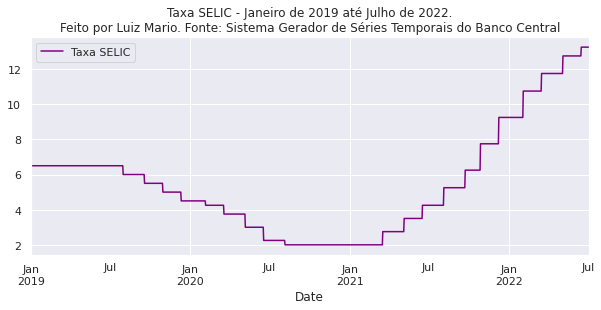

In [ ]:
# Gerando um gráfico com a Taxa Selic no decorrer do tempo
# Buscando a série da SELIC dentro do sistema gerador de séries de tempo
tx_selic = sgs.get({'Taxa SELIC':432}, start = '2019-01-01')
ipca = sgs.get({'IPCA': 433}, start = '2019-01-01')
# Gerando o gráfico 
# Gerando o gráfico
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 4)})
tx_selic.plot(color = 'purple')
plt.title('Taxa SELIC - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central', loc='center')

Text(0.5, 1.0, 'IPCA em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central')

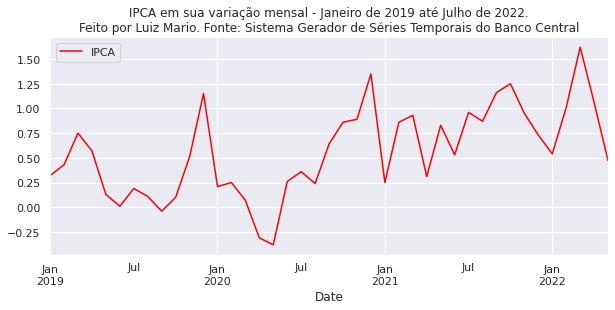

In [ ]:
# Gráfico do IPCA 
ipca = sgs.get({'IPCA': 433}, start = '2019-01-01')
# Gerando o gráfico
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 4)})
ipca.plot(color = 'red')
plt.title('IPCA em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central', loc='center')

Text(0.5, 1.0, 'PNDA em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central')

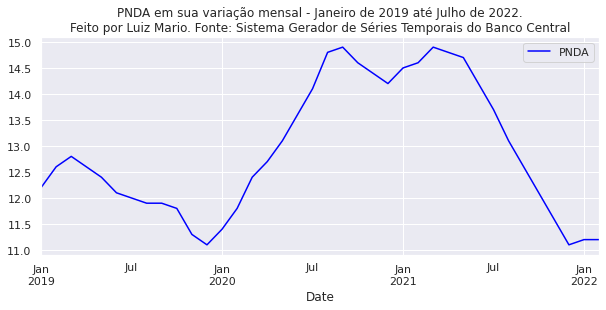

In [ ]:
# Gráfico comparando a PNAD (Taxa de Desemprego) com o IPCA
# Pegando os dados
pnad = sgs.get({'PNDA': 24369}, start = '2019-01-01')
# Plotando o gráfico 
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 4)})
pnad.plot(color = 'blue')
plt.title('PNDA em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central', loc='center')

Text(0.5, 1.0, 'IPCA e IGP comparados em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central')

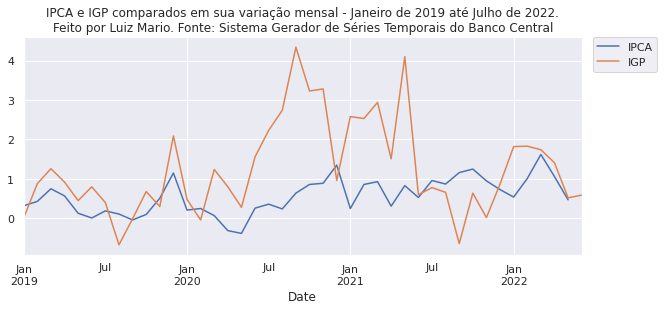

In [ ]:
# Gráfico conjunto IGP e IPCA
dados = sgs.get([433,189], start = '2019-01-01')
# Plotando o gráfico 
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 4)})
dados.plot()
plt.legend(labels = ["IPCA","IGP"], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title('IPCA e IGP comparados em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central', loc='center')

Text(0.5, 1.0, 'Índices de Taxas de Câmbio comparadas em sua variação mensal - Janeiro de 2019 até Janeiro de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central')

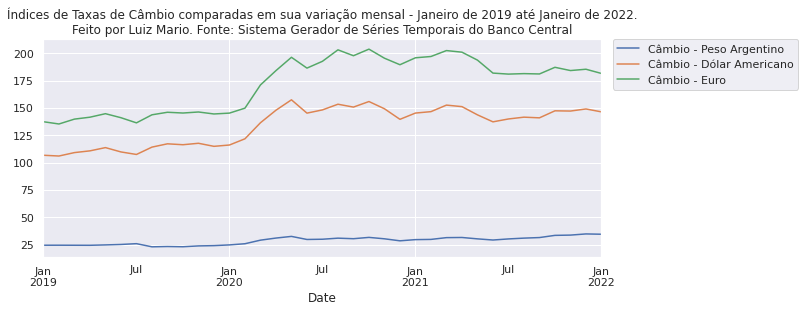

In [6]:
# Gráfico câmbio comparado 
dados_cambio = sgs.get([11756,11753,11773], start ='2019-01-01')
# Plotando o gráfico 
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 4)})
dados_cambio.plot()
plt.legend(labels = ["Câmbio - Peso Argentino","Câmbio - Dólar Americano","Câmbio - Euro"], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title('Índices de Taxas de Câmbio comparadas em sua variação mensal - Janeiro de 2019 até Janeiro de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central', loc='center')